## ANÁLISIS EXPLORATORIO DE DATOS (EDA):

### ¿España como potencia en renovables?
- ¿Progresión de las renovables en España en los últimos años? Hipótesis a contrastar: previsiblemente hay un aumento
- ¿Superficie y clima suficiente y favorable para su crecimiento? 
- ¿Con respecto a Europa? en función del PIB 
- ¿A nivel global?
- ¿Cuál es la renovable más explotada y cúal la más explotable a priori?


In [292]:
# Librery
from utils.utilsEDA import *

In [293]:
# Read all csv 

preroot='/Users/mcgg/Documents/TheBridge_DataScience_py_local/02_DATA_ANALISIS/EDA_MC/EDA-energia/energy-data/src'

df_world=pd.read_csv(preroot+'/data/world_energy_data.csv')
df_spn=pd.read_csv(preroot+'/data/spn_energy_data.csv')
df_wheather_spn=pd.read_csv(preroot+'/data/spn_weather_features.csv')

In [294]:
comp_colna_filna(df_spn,'time')

Se mantienen las mismas filas y columnas: True y False
Número fil y col antes (35064, 29) Número fil y col después (35064, 26)


### *Extracción inicial info. de los CSVs*

In [295]:
print('* Datos globales: *')
df_world.info()
#df_world.describe()


* Datos globales: *
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17239 entries, 0 to 17238
Columns: 128 entries, iso_code to wind_energy_per_capita
dtypes: float64(125), int64(1), object(2)
memory usage: 16.8+ MB


In [296]:
print('* Datos energía España: *')
df_spn.info()

* Datos energía España: *
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        3

In [297]:
print('* Datos clima España: *')
df_wheather_spn.info()

* Datos clima España: *
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object

### LIMPIEZA DE DATOS: 


#### csv global

```df_world```: DataFrame que contiene los datos de energía a nivel global recogidos desde el año 1900-2021.

Se distingue entre los siguientes conjuntos:

- Producción
- Consumo


|column	|description	|source|
|-------|---------------|------|
|iso_code|	ISO 3166-1 alpha-3 three-letter country codes|	International Organization for Standardization|
|country|	Geographic location|	Our World in Data|
|year	|Year of observation	|Our World in Data|
|coal_prod_change_pct|	Annual percentage change in coal production	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Shift Data Portal|
|coal_prod_change_twh|	Annual change in coal production, measured in terawatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy and Shift Data Portal|
|gas_prod_change_pct	|Annual percentage change in gas production	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Shift Data Portal|
|gas_prod_change_twh|	Annual change in gas production, measured in terawatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Shift Data Portal|
|oil_prod_change_pct|	Annual percentage change in oil production	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Shift Data Portal|
|oil_prod_change_twh	|Annual change in oil production, measured in terawatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Shift Data Portal|
|energy_cons_change_pct	|Annual percentage change in primary energy consumption|	Calculated by Our World in Data based on BP Statistical Review of World Energy and Shift Data Portal|
|energy_cons_change_twh	|Annual change in primary energy consumption, measured in terawatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Shift Data Portal|
|biofuel_share_elec|	Share of electricity generation that comes from biofuels	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|biofuel_cons_change_pct|	Annual percentage change in biofuel consumption	|Calculated by Our World in Data based on BP Statistical Review of World Energy|
|biofuel_share_energy	|Share of primary energy consumption that comes from biofuels	|Calculated by Our World in Data based on BP Statistical Review of World Energy|
|biofuel_cons_change_twh	|Annual change in biofuel consumption, measured in terawatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy|
|biofuel_consumption	|Primary energy consumption from biofuels, measured in terawatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy|
|biofuel_elec_per_capita	|Per capita electricity generation from biofuels, measured in kilowatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|biofuel_cons_per_capita	|Per capita primary energy consumption from biofuels, measured in kilowatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy and UN Population estimates|
|carbon_intensity_elec	|Carbon intensity of electricity production, measured in grams of carbon dioxide emitted per kilowatt-hour	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|coal_share_elec	|Share of electricity generation that comes from coal	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|coal_cons_change_pct	|Annual percentage change in coal consumption	|Calculated by Our World in Data based on BP Statistical Review of World Energy|
|coal_share_energy	|Share of primary energy consumption that comes from coal	|Calculated by Our World in Data based on BP Statistical Review of World Energy|
|coal_cons_change_twh	|Annual change in coal consumption, measured in terawatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy|
coal_consumption	|Primary energy consumption from coal, measured in terawatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy
|coal_elec_per_capita	|Per capita electricity generation from coal, measured in kilowatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|coal_cons_per_capita	|Per capita primary energy consumption from coal, measured in kilowatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy|
|coal_production	|Coal production, measured in terawatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Shift Data Portal|
|coal_prod_per_capita	|Per capita coal production, measured in kilowatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy; Gapminder and UN Population Estimates|
|electricity_demand	|Electricity demand, measured in terawatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|electricity_generation	|Electricity generation, measured in terawatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|greenhouse_gas_emissions|	Greenhouse-gas emissions produced in the generation of electricity, measured in million tonnes of CO2 equivalent	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|biofuel_electricity	|Electricity generation from biofuels, measured in terawatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|coal_electricity	|Electricity generation from coal, measured in terawatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|fossil_electricity|	Electricity generation from fossil fuels, measured in terawatt-hours. This is the sum of electricity generation from coal, oil and gas.	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|gas_electricity|	Electricity generation from gas, measured in terawatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|hydro_electricity|	Electricity generation from hydropower, measured in terawatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|nuclear_electricity	|Electricity generation from nuclear power, measured in terawatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|oil_electricity	|Electricity generation from oil, measured in terawatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|other_renewable_electricity	|Electricity generation from other renewable sources including biofuels, measured in terawatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|other_renewable_exc_biofuel_electricity|	Electricity generation from other renewable sources excluding biofuels, measured in terawatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|renewables_electricity|	Electricity generation from renewables, measured in terawatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|solar_electricity|	Electricity generation from solar, measured in terawatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|wind_electricity	|Electricity generation from wind, measured in terawatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|energy_per_gdp|	Energy consumption per unit of GDP. This is measured in kilowatt-hours per 2011 international-$.|	Calculated by Our World in Data based on BP Statistical Review of World Energy; Shift Data Portal and Maddison Project Database|
|energy_per_capita	|Primary energy consumption per capita, measured in kilowatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy; Shift Data Portal and UN Population estimates|
|fossil_cons_change_pct|	Annual percentage change in fossil fuel consumption|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|fossil_share_energy	|Share of primary energy consumption that comes from fossil fuels|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|fossil_cons_change_twh	|Annual change in fossil fuel consumption, measured in terawatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|fossil_fuel_consumption|	Fossil fuel consumption, measured in terawatt-hours. This is the sum of primary energy from coal, oil and gas.|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|fossil_energy_per_capita|	Per capita fossil fuel consumption, measured in kilowatt-hours. This is the sum of primary energy from coal, oil and gas.|	Calculated by Our World in Data based on BP Statistical Review of World Energy; Gapminder and UN Population Estimates|
|fossil_cons_per_capita	|Per capita fossil fuel consumption, measured in kilowatt-hours. This is the sum of primary energy from coal, oil and gas.	|Calculated by Our World in Data based on BP Statistical Review of World Energy; Gapminder and UN Population Estimates|
|fossil_share_elec	|Share of electricity generation that comes from fossil fuels (coal, oil and gas combined)	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|gas_share_elec|	Share of electricity generation that comes from gas|	Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|gas_cons_change_pct	|Annual percentage change in gas consumption|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|gas_share_energy|	Share of primary energy consumption that comes from gas|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|gas_cons_change_twh	|Annual change in gas consumption, measured in terawatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|gas_consumption	|Primary energy consumption from gas, measured in terawatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|gas_elec_per_capita	|Per capita electricity generation from gas, measured in kilowatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy; Ember; and UN Population Estimates|
|gas_energy_per_capita|	Per capita primary energy consumption from gas, measured in kilowatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy; Gapminder and UN Population Estimates|
|gas_production	|Gas production, measured in terawatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Shift Data Portal|
|gas_prod_per_capita	|Per capita gas production, measured in kilowatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy; Gapminder and UN Population Estimates|
|hydro_share_elec|	Share of electricity generation that comes from hydropower	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|hydro_cons_change_pct	|Annual percentage change in hydropower consumption|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|hydro_share_energy	|Share of primary energy consumption that comes from hydropower|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|hydro_cons_change_twh	|Annual change in hydropower consumption, measured in terawatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|hydro_consumption	|Primary energy consumption from hydropower, measured in terawatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|hydro_elec_per_capita	|Per capita electricity generation from hydropower, measured in kilowatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy; Ember; and UN Population Estimates|
|hydro_energy_per_capita	|Per capita primary energy consumption from hydropower, measured in kilowatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy; Gapminder and UN Population Estimates|
|low_carbon_share_elec	|Share of electricity generation that comes from low-carbon sources. This is the sum of electricity from renewables and nuclear|	Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|low_carbon_electricity	|Electricity generation from low-carbon sources, measured in terawatt-hours. This is the sum of electricity generation from renewables and nuclear power	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|low_carbon_elec_per_capita|	Per capita electricity generation from low-carbon sources, measured in kilowatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy; Ember; and UN Population Estimates|
|low_carbon_cons_change_pct|	Annual percentage change in low-carbon energy consumption	|Calculated by Our World in Data based on BP Statistical Review of World Energy|
|low_carbon_share_energy	|Share of primary energy consumption that comes from low-carbon sources. This is the sum of primary energy from renewables and nuclear|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|low_carbon_cons_change_twh	|Annual change in low-carbon energy consumption, measured in terawatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|low_carbon_consumption	|Primary energy consumption from low-carbon sources, measured in terawatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|low_carbon_energy_per_capita	|Per capita primary energy consumption from low-carbon sources, measured in kilowatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy; Gapminder and UN Population Estimates|
net_elec_imports	|Net electricity imports, measured in terawatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|net_elec_imports_share_demand|	Net electricity imports as a share of electricity demand|	Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|nuclear_share_elec	|Share of electricity generation that comes from nuclear power	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|nuclear_cons_change_pct	|Annual percentage change in nuclear consumption|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|nuclear_share_energy	|Share of primary energy consumption that comes from nuclear power|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|nuclear_cons_change_twh	|Annual change in nuclear consumption, measured in terawatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy|
|nuclear_consumption	|Primary energy consumption from nuclear power, measured in terawatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|nuclear_elec_per_capita	|Per capita electricity generation from nuclear power, measured in kilowatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy; Ember; and UN Population Estimates|
|nuclear_energy_per_capita	|Per capita primary energy consumption from nuclear, measured in kilowatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy; Gapminder and UN Population Estimates|
|oil_share_elec|	Share of electricity generation that comes from oil|	Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|oil_cons_change_pct	|Annual percentage change in oil consumption	|Calculated by Our World in Data based on BP Statistical Review of World Energy|
|oil_share_energy|	Share of primary energy consumption that comes from oil|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|oil_cons_change_twh	|Annual change in oil consumption, measured in terawatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy|
|oil_consumption|	Primary energy consumption from oil, measured in terawatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy|
|oil_elec_per_capita	|Per capita electricity generation from oil, measured in kilowatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|oil_energy_per_capita	|Per capita primary energy consumption from oil, measured in kilowatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy; Gapminder and UN Population Estimates|
|oil_production	|Oil production, measured in terawatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Shift Data Portal|
|oil_prod_per_capita|	Per capita oil production, measured in kilowatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy; Gapminder and UN Population Estimates|
|other_renewables_elec_per_capita	|Per capita electricity generation from other renewables including biofuels, measured in kilowatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy; Ember; and UN Population Estimates|
|other_renewables_elec_per_capita_exc_biofuel|	Per capita electricity generation from other renewables excluding biofuels, measured in kilowatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy; Ember; and UN Population Estimates|
|other_renewables_share_elec|	Share of electricity generation that comes from other renewables including biofuels|	Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|other_renewables_share_elec_exc_biofuel	|Share of electricity generation that comes from other renewables excluding biofuels|	Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|other_renewables_cons_change_pct|	Annual percentage change in energy consumption from other renewables	|Calculated by Our World in Data based on BP Statistical Review of World Energy|
|other_renewables_share_energy	|Share of primary energy consumption that comes from other renewables|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|other_renewables_cons_change_twh	|Annual change in other renewable consumption, measured in terawatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|other_renewable_consumption	|Primary energy consumption from other renewables, measured in terawatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|other_renewables_energy_per_capita	|Per capita primary energy consumption from other renewables, measured in kilowatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy; Gapminder and UN Population Estimates|
|per_capita_electricity|	Electricity generation per capita, measured in kilowatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy; Ember; and UN Population Estimates|
|population|	Total population|	Gapminder and UN Population estimates|
|primary_energy_consumption|	Primary energy consumption, measured in terawatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy|
|renewables_elec_per_capita|	Per capita electricity generation from renewables, measured in kilowatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy; Gapminder and UN Population Estimates|
|renewables_share_elec|	Share of electricity generation that comes from renewables	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|renewables_cons_change_pct	|Annual percentage change in renewable energy consumption	|Calculated by Our World in Data based on BP Statistical Review of World Energy|
|renewables_share_energy	|Share of primary energy consumption that comes from renewables|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|renewables_cons_change_twh	|Annual change in renewable energy consumption, measured in terawatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|renewables_consumption	|Primary energy consumption from renewables, measured in terawatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|renewables_energy_per_capita	|Per capita primary energy consumption from renewables, measured in kilowatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy; Ember; and UN Population Estimates|
|solar_share_elec	|Share of electricity generation that comes from solar|	Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|solar_cons_change_pct	|Annual percentage change in solar consumption	|Calculated by Our World in Data based on BP Statistical Review of World Energy|
|solar_share_energy|	Share of primary energy consumption that comes from solar	|Calculated by Our World in Data based on BP Statistical Review of World Energy|
|solar_cons_change_twh	|Annual change in solar consumption, measured in terawatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|solar_consumption	|Primary energy consumption from solar, measured in terawatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|solar_elec_per_capita	|Per capita electricity generation from solar, measured in kilowatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy; Ember; and UN Population Estimates|
|solar_energy_per_capita	|Per capita primary energy consumption from solar, measured in kilowatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy; Gapminder and UN Population Estimates|
|gdp	|Total real gross domestic product, inflation-adjusted	|Maddison Project Database|
|wind_share_elec	|Share of electricity generation that comes from wind|	Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|wind_cons_change_pct	|Annual percentage change in wind consumption	|Calculated by Our World in Data based on BP Statistical Review of World Energy|
|wind_share_energy	|Share of primary energy consumption that comes from wind	|Calculated by Our World in Data based on BP Statistical Review of World Energy|
|wind_cons_change_twh	|Annual change in wind consumption, measured in terawatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|wind_consumption	|Primary energy consumption from wind, measured in terawatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|wind_elec_per_capita	|Per capita electricity generation from wind, measured in kilowatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy; Ember; and UN Population Estimates|
|wind_energy_per_capita	|Per capita primary energy consumption from wind, measured in kilowatt-hours|

In [298]:
comp_colna_filna(df_world,'year')

Se mantienen las mismas filas y columnas: True y False
Número fil y col antes (17239, 128) Número fil y col después (17239, 127)


In [299]:
# Se comprueba los años de los cuales tenemos datos 
df_world.year.unique()

array([1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910,
       1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921,
       1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021])

In [300]:
print('Número de paises+continentes tenidos en cuenta:',len(df_world.country.unique()))
df_world.country.unique()

Número de paises+continentes tenidos en cuenta: 241


array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Angola', 'Antarctica', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Asia Pacific', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'CIS', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Czechoslovakia', 'Democratic Republic of Congo',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic',
       'East Germany', 'Eastern Africa', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea'

In [301]:
columnas=df_world.columns.to_list()
columnas

['iso_code',
 'country',
 'year',
 'coal_prod_change_pct',
 'coal_prod_change_twh',
 'gas_prod_change_pct',
 'gas_prod_change_twh',
 'oil_prod_change_pct',
 'oil_prod_change_twh',
 'energy_cons_change_pct',
 'energy_cons_change_twh',
 'biofuel_share_elec',
 'biofuel_elec_per_capita',
 'biofuel_cons_change_pct',
 'biofuel_share_energy',
 'biofuel_cons_change_twh',
 'biofuel_consumption',
 'biofuel_cons_per_capita',
 'carbon_intensity_elec',
 'coal_share_elec',
 'coal_cons_change_pct',
 'coal_share_energy',
 'coal_cons_change_twh',
 'coal_consumption',
 'coal_elec_per_capita',
 'coal_cons_per_capita',
 'coal_production',
 'coal_prod_per_capita',
 'electricity_demand',
 'biofuel_electricity',
 'coal_electricity',
 'fossil_electricity',
 'gas_electricity',
 'hydro_electricity',
 'nuclear_electricity',
 'oil_electricity',
 'other_renewable_exc_biofuel_electricity',
 'other_renewable_electricity',
 'renewables_electricity',
 'solar_electricity',
 'wind_electricity',
 'electricity_generation'

**Agrupación de df_global por paises:**

In [302]:
# Porcentaje de datos de España con respecto al global:

(df_world.country[df_world.country=='Spain'].count()/len(df_world.country))*100

0.7076976622773943

In [303]:
col_pct=[i for i in df_world.columns if i[-3::] =='pct']
col_pct

['coal_prod_change_pct',
 'gas_prod_change_pct',
 'oil_prod_change_pct',
 'energy_cons_change_pct',
 'biofuel_cons_change_pct',
 'coal_cons_change_pct',
 'fossil_cons_change_pct',
 'gas_cons_change_pct',
 'hydro_cons_change_pct',
 'low_carbon_cons_change_pct',
 'nuclear_cons_change_pct',
 'oil_cons_change_pct',
 'other_renewables_cons_change_pct',
 'renewables_cons_change_pct',
 'solar_cons_change_pct',
 'wind_cons_change_pct']

In [304]:
df_global_pct1=df_world.loc[:,col_pct]
df_global_pct1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17239 entries, 0 to 17238
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   coal_prod_change_pct              7152 non-null   float64
 1   gas_prod_change_pct               5074 non-null   float64
 2   oil_prod_change_pct               6474 non-null   float64
 3   energy_cons_change_pct            9983 non-null   float64
 4   biofuel_cons_change_pct           679 non-null    float64
 5   coal_cons_change_pct              4334 non-null   float64
 6   fossil_cons_change_pct            4779 non-null   float64
 7   gas_cons_change_pct               4278 non-null   float64
 8   hydro_cons_change_pct             4229 non-null   float64
 9   low_carbon_cons_change_pct        4413 non-null   float64
 10  nuclear_cons_change_pct           1840 non-null   float64
 11  oil_cons_change_pct               4779 non-null   float64
 12  othe

In [305]:
#dic_index_country=df_world.groupby('iso_code').groups
#df_world_country=df_world.iso_code.loc[:,dic_index_country.keys()]


In [306]:
df_world.gdp[df_world.year==2018]

118      6.759497e+10
239               NaN
360      3.400911e+10
481      5.903175e+11
522               NaN
             ...     
16730             NaN
16850    1.136302e+14
16902    6.904273e+10
17115    6.097862e+10
17236    2.271535e+10
Name: gdp, Length: 235, dtype: float64

In [307]:
df_world[df_world.year==2018].gdp

118      6.759497e+10
239               NaN
360      3.400911e+10
481      5.903175e+11
522               NaN
             ...     
16730             NaN
16850    1.136302e+14
16902    6.904273e+10
17115    6.097862e+10
17236    2.271535e+10
Name: gdp, Length: 235, dtype: float64

In [308]:
#[pais for pais in df_world.country.unique()if df_world.gdp[(df_world.country==pais)&(df_world.year==2018)]>df_world.gdp[(df_world.country=='Spain')&(df_world.year==2018)]]

In [309]:
#[df_world[df_world.gdp[(df_world.country==pais)&(df_world.year==2018)]>=df_world.gdp[(df_world.country=='Spain')&(df_world.year==2018)]]for pais in df_world.country]

In [310]:
#df_world.gdp[df_world.country=='Spain']
#df_world[df_world['gdp']>=df_world.gdp[df_world.country=='Spain']]

In [311]:
#for key in dic_index_country.keys:

In [312]:
# Eliminamos las filas que tengan NaN completamente
df=df_global_pct1.dropna(how='any')
df=df.dropna(axis=1,how='all')

print(df.shape)

df=df_global_pct1.dropna(how='all')
df=df.dropna(axis=1,how='all')

print(df.shape)


(383, 16)
(14171, 16)


In [313]:
df_global_pct=df_world.loc[:,col_pct+['iso_code']]
df=df_global_pct.dropna(how='all')
df=df.dropna(axis=1,how='all')

print(df.shape)
print(df.iso_code.unique())
dic_index_country_pct=df_global_pct.groupby('iso_code').groups

print('Número de únicos:',len(df_global_pct.iso_code.unique()))
df_global_pct.iso_code.unique()

(17106, 17)
['AFG' 'OWID_AFR' 'ALB' 'DZA' 'ASM' 'AGO' nan 'ATG' 'ARG' 'ARM' 'ABW'
 'AUS' 'AUT' 'AZE' 'BHS' 'BHR' 'BGD' 'BRB' 'BLR' 'BEL' 'BLZ' 'BEN' 'BMU'
 'BTN' 'BOL' 'BIH' 'BWA' 'BRA' 'VGB' 'BRN' 'BGR' 'BFA' 'BDI' 'KHM' 'CMR'
 'CAN' 'CPV' 'CYM' 'CAF' 'TCD' 'CHL' 'CHN' 'COL' 'COM' 'COG' 'COK' 'CRI'
 'CIV' 'HRV' 'CUB' 'CYP' 'CZE' 'COD' 'DNK' 'DJI' 'DMA' 'DOM' 'ECU' 'EGY'
 'SLV' 'GNQ' 'ERI' 'EST' 'SWZ' 'ETH' 'OWID_EUR' 'OWID_EU27' 'FRO' 'FLK'
 'FJI' 'FIN' 'FRA' 'GUF' 'PYF' 'GAB' 'GMB' 'GEO' 'DEU' 'GHA' 'GRC' 'GRL'
 'GRD' 'GLP' 'GUM' 'GTM' 'GIN' 'GNB' 'GUY' 'HTI' 'HND' 'HKG' 'HUN' 'ISL'
 'IND' 'IDN' 'IRN' 'IRQ' 'IRL' 'ISR' 'ITA' 'JAM' 'JPN' 'JOR' 'KAZ' 'KEN'
 'KIR' 'OWID_KOS' 'KWT' 'KGZ' 'LAO' 'LVA' 'LBN' 'LSO' 'LBR' 'LBY' 'LTU'
 'LUX' 'MAC' 'MDG' 'MWI' 'MYS' 'MDV' 'MLI' 'MLT' 'MTQ' 'MRT' 'MUS' 'MEX'
 'FSM' 'MDA' 'MNG' 'MNE' 'MSR' 'MAR' 'MOZ' 'MMR' 'NAM' 'NRU' 'NPL' 'NLD'
 'ANT' 'NCL' 'NZL' 'NIC' 'NER' 'NGA' 'NIU' 'PRK' 'MKD' 'MNP' 'NOR' 'OMN'
 'PAK' 'PSE' 'PAN' 'PNG' 'PRY' 'PER' 'PHL' '

array(['AFG', 'OWID_AFR', 'ALB', 'DZA', 'ASM', 'AGO', nan, 'ATG', 'ARG',
       'ARM', 'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB',
       'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA',
       'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN',
       'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM', 'COG',
       'COK', 'CRI', 'CIV', 'HRV', 'CUB', 'CYP', 'CZE', 'COD', 'DNK',
       'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST',
       'SWZ', 'ETH', 'OWID_EUR', 'OWID_EU27', 'FRO', 'FLK', 'FJI', 'FIN',
       'FRA', 'GUF', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GRC',
       'GRL', 'GRD', 'GLP', 'GUM', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI',
       'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL',
       'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KIR', 'OWID_KOS',
       'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LTU',
       'LUX', 'MAC', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MTQ',
       '

In [314]:
df[df.iso_code=='ALB']

coal_prod_change_pct  gas_prod_change_pct  oil_prod_change_pct  \
242                   NaN                  NaN                  NaN   
243                   NaN                  NaN                  NaN   
244                   NaN                  NaN                  NaN   
245                   NaN                  NaN                  NaN   
246                   NaN                  NaN                  NaN   
..                    ...                  ...                  ...   
358                   NaN                28.57                13.14   
359                   NaN                  NaN                  NaN   
360                   NaN                  NaN                  NaN   
361                   NaN                  NaN                  NaN   
362                   NaN                  NaN                  NaN   

     energy_cons_change_pct  biofuel_cons_change_pct  coal_cons_change_pct  \
242                     NaN                      NaN                   NaN   
243                     NaN                      NaN                   NaN   
244                     NaN                      NaN                   NaN   
245                     NaN                      NaN                   NaN   
246                     NaN                      NaN                   NaN   
..                      ...                      ...                   ...   
358                  11.445                      NaN                   NaN   
359                  -3.282                      NaN                   NaN   
360                  13.428                      NaN                   NaN   
361                 -22.110                      NaN                   NaN   
362                     NaN                      NaN                   NaN   

     fossil_cons_change_pct  gas_cons_change_pct  hydro_cons_change_pct  \
242                     NaN                  NaN                    NaN   
243                     NaN                  NaN                    NaN   
244                     NaN                  NaN                    NaN   
245                     NaN                  NaN                    NaN   
246                     NaN                  NaN                    NaN   
..                      ...                  ...                    ...   
358                     NaN                  NaN                    NaN   
359                     NaN                  NaN                    NaN   
360                     NaN                  NaN                    NaN   
361                     NaN                  NaN                    NaN   
362                     NaN                  NaN                    NaN   

     low_carbon_cons_change_pct  nuclear_cons_change_pct  oil_cons_change_pct  \
242                         NaN                      NaN                  NaN   
243                         NaN                      NaN                  NaN   
244                         NaN                      NaN                  NaN   
245                         NaN                      NaN                  NaN   
246                         NaN                      NaN                  NaN   
..                          ...                      ...                  ...   
358                         NaN                      NaN                  NaN   
359                         NaN                      NaN                  NaN   
360                         NaN                      NaN                  NaN   
361                         NaN                      NaN                  NaN   
362                         NaN                      NaN                  NaN   

     other_renewables_cons_change_pct  renewables_cons_change_pct  \
242                               NaN                         NaN   
243                               NaN                         NaN   
244                               NaN                         NaN   
245                               NaN                         NaN

#### csv España

```df_spn```: DataFrame que contiene los datos de energía en españa recogidos desde el año 2015 hasta 31 dic 2018

|column	|description	|
|-------|---------------|
|time||
|generation biomass||
|generation fossil brown coal/lignite||
|generation fossil bcoal-derived gas||
|generation fossil gas||
|generation fossil hard coal||
|generation fossil oil||
|generation fossil oil shale||
|generation fossil peat||
|generation geothermal||
|generation hydro pumped storage aggregated||
|generation hydro pumped storage consumption||
|generation hydro run-of-river and poundage||
|generation hydro water reservoir||
|generation marine||
|generation nuclear||
|generation other||
|generation other renewable||
|generation solar||
|generation waste||
|generation wind offshore||
|generation wind onshore||
|forecast solar day ahead||
|forecast wind offshore eday ahead||
|forecast wind onshore day ahead||
|total load forecast||
|total load actual||
|price day ahead||
|price actual||


In [315]:
df_spn.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

In [316]:
df_spn.tail()

time  generation biomass  \
35059  2018-12-31 19:00:00+01:00               297.0   
35060  2018-12-31 20:00:00+01:00               296.0   
35061  2018-12-31 21:00:00+01:00               292.0   
35062  2018-12-31 22:00:00+01:00               293.0   
35063  2018-12-31 23:00:00+01:00               290.0   

       generation fossil brown coal/lignite  \
35059                                   0.0   
35060                                   0.0   
35061                                   0.0   
35062                                   0.0   
35063                                   0.0   

       generation fossil coal-derived gas  generation fossil gas  \
35059                                 0.0                 7634.0   
35060                                 0.0                 7241.0   
35061                                 0.0                 7025.0   
35062                                 0.0                 6562.0   
35063                                 0.0                 6926.0   

       generation fossil hard coal  generation fossil oil  \
35059                       2628.0                  178.0   
35060                       2566.0                  174.0   
35061                       2422.0                  168.0   
35062                       2293.0                  163.0   
35063                       2166.0                  163.0   

       generation fossil oil shale  generation fossil peat  \
35059                          0.0                     0.0   
35060                          0.0                     0.0   
35061                          0.0                     0.0   
35062                          0.0                     0.0   
35063                          0.0                     0.0   

       generation geothermal  ...  generation waste  generation wind offshore  \
35059                    0.0  ...             277.0                       0.0   
35060                    0.0  ...             280.0                       0.0   
35061                    0.0  ...             286.0                       0.0   
35062                    0.0  ...             287.0                       0.0   
35063                    0.0  ...             287.0                       0.0   

       generation wind onshore  forecast solar day ahead  \
35059                   3113.0                      96.0   
35060                   3288.0                      51.0   
35061                   3503.0                      36.0   
35062                   3586.0                      29.0   
35063                   3651.0                      26.0   

       forecast wind offshore eday ahead  forecast wind onshore day ahead  \
35059                                NaN                           3253.0   
35060                                NaN                           3353.0   
35061                                NaN                           3404.0   
35062                                NaN                           3273.0   
35063                                NaN                           3117.0   

       total load forecast  total load actual  price day ahead  price actual  
35059              30619.0            30653.0            68.85         77.02  
35060              29932.0            29735.0            68.40         76.16  
35061              27903.0            28071.0            66.88         74.30  
35062              25450.0            25801.0            63.93         69.89  
35063              24424.0            24455.0            64.27         69.88  

[5 rows x 29 columns]

In [317]:
# Se reemplaza 'time' quitándole el intervalo
df_spn['time']=df_spn['time'].replace({'\+01:00|\+02:00|\+03:00':''},regex=True)

In [318]:
df_spn['time_dt']=transf_dt(df_spn,'time')
df_spn.head()

time  generation biomass  \
0  2015-01-01 00:00:00               447.0   
1  2015-01-01 01:00:00               449.0   
2  2015-01-01 02:00:00               448.0   
3  2015-01-01 03:00:00               438.0   
4  2015-01-01 04:00:00               428.0   

   generation fossil brown coal/lignite  generation fossil coal-derived gas  \
0                                 329.0                                 0.0   
1                                 328.0                                 0.0   
2                                 323.0                                 0.0   
3                                 254.0                                 0.0   
4                                 187.0                                 0.0   

   generation fossil gas  generation fossil hard coal  generation fossil oil  \
0                 4844.0                       4821.0                  162.0   
1                 5196.0                       4755.0                  158.0   
2                 4857.0                       4581.0                  157.0   
3                 4314.0                       4131.0                  160.0   
4                 4130.0                       3840.0                  156.0   

   generation fossil oil shale  generation fossil peat  generation geothermal  \
0                          0.0                     0.0                    0.0   
1                          0.0                     0.0                    0.0   
2                          0.0                     0.0                    0.0   
3                          0.0                     0.0                    0.0   
4                          0.0                     0.0                    0.0   

   ...  generation wind offshore  generation wind onshore  \
0  ...                       0.0                   6378.0   
1  ...                       0.0                   5890.0   
2  ...                       0.0                   5461.0   
3  ...                       0.0                   5238.0   
4  ...                       0.0                   4935.0   

   forecast solar day ahead  forecast wind offshore eday ahead  \
0                      17.0                                NaN   
1                      16.0                                NaN   
2                       8.0                                NaN   
3                       2.0                                NaN   
4                       9.0                                NaN   

   forecast wind onshore day ahead  total load forecast  total load actual  \
0                           6436.0              26118.0            25385.0   
1                           5856.0              24934.0            24382.0   
2                           5454.0              23515.0            22734.0   
3                           5151.0              22642.0            21286.0   
4                           4861.0              21785.0            20264.0   

   price day ahead  price actual             time_dt  
0            50.10         65.41 2015-01-01 00:00:00  
1            48.10         64.92 2015-01-01 01:00:00  
2            47.33         64.48 2015-01-01 02:00:00  
3            42.27         59.32 2015-01-01 03:00:00  
4            38.41         56.04 2015-01-01 04:00:00  

[5 rows x 30 columns]

In [319]:
df_spn=del_colna_filna(df_spn,['time','time_dt'])

In [320]:
df_spn.isna().sum()

# Se eliminan las columnas de nan y después filas completar con la media anterior siguiente o anterior /siguiente

time                                            0
time_dt                                         0
generation biomass                             19
generation fossil brown coal/lignite           18
generation fossil coal-derived gas             18
generation fossil gas                          18
generation fossil hard coal                    18
generation fossil oil                          19
generation fossil oil shale                    18
generation fossil peat                         18
generation geothermal                          18
generation hydro pumped storage consumption    19
generation hydro run-of-river and poundage     19
generation hydro water reservoir               18
generation marine                              19
generation nuclear                             17
generation other                               18
generation other renewable                     18
generation solar                               18
generation waste                               19


In [321]:
df_spn.fillna(method='ffill',inplace=True) # Se van rellenando columnas hacia delante, es decir, cogiendo el valor anterior 
df_spn.isna().sum()

time                                           0
time_dt                                        0
generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil coal-derived gas             0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation fossil oil shale                    0
generation fossil peat                         0
generation geothermal                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation marine                              0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind offs

In [322]:
df_spn=df_spn.loc[:,df_spn.columns.str.startswith('generation')+df_spn.columns.str.startswith('time')]
[df_spn.drop(columns=col,inplace=True) for col in df_spn.columns if (df_spn[col]==0).sum()==len(df_spn)]
df_spn.head()

time             time_dt  generation biomass  \
0  2015-01-01 00:00:00 2015-01-01 00:00:00               447.0   
1  2015-01-01 01:00:00 2015-01-01 01:00:00               449.0   
2  2015-01-01 02:00:00 2015-01-01 02:00:00               448.0   
3  2015-01-01 03:00:00 2015-01-01 03:00:00               438.0   
4  2015-01-01 04:00:00 2015-01-01 04:00:00               428.0   

   generation fossil brown coal/lignite  generation fossil gas  \
0                                 329.0                 4844.0   
1                                 328.0                 5196.0   
2                                 323.0                 4857.0   
3                                 254.0                 4314.0   
4                                 187.0                 4130.0   

   generation fossil hard coal  generation fossil oil  \
0                       4821.0                  162.0   
1                       4755.0                  158.0   
2                       4581.0                  157.0   
3                       4131.0                  160.0   
4                       3840.0                  156.0   

   generation hydro pumped storage consumption  \
0                                        863.0   
1                                        920.0   
2                                       1164.0   
3                                       1503.0   
4                                       1826.0   

   generation hydro run-of-river and poundage  \
0                                      1051.0   
1                                      1009.0   
2                                       973.0   
3                                       949.0   
4                                       953.0   

   generation hydro water reservoir  generation nuclear  generation other  \
0                            1899.0              7096.0              43.0   
1                            1658.0              7096.0              43.0   
2                            1371.0              7099.0              43.0   
3                             779.0              7098.0              43.0   
4                             720.0              7097.0              43.0   

   generation other renewable  generation solar  generation waste  \
0                        73.0              49.0             196.0   
1                        71.0              50.0             195.0   
2                        73.0              50.0             196.0   
3                        75.0              50.0             191.0   
4                        74.0              42.0             189.0   

   generation wind onshore  
0                   6378.0  
1                   5890.0  
2                   5461.0  
3                   5238.0  
4                   4935.0

---
*Agrupaciones*: 

---

In [323]:
df_spn_day=df_spn.copy()
df_spn_day['day']=df_spn_day['time'].replace({'| \d+\d+:\d+\d+:\d+\d+|':''},regex=True)
df_spn_year=df_spn_day.copy()

# Se crea una columna tipo datatime llamada 'day_dt' equivale al str de 'time' 
df_spn_year['day_dt']=transf_dt(df_spn_year,'day',change='%Y-%m-%d')

df_spn_month=df_spn_year.groupby(df_spn_year['day_dt'].dt.month).mean()
df_spn_year=df_spn_year.groupby(df_spn_year['day_dt'].dt.year).mean()

df_spn_day_2015=df_spn_day.loc[df_spn_day['day'].str.startswith('2015'),:]
df_spn_day_2016=df_spn_day.loc[df_spn_day['day'].str.startswith('2016'),:]
df_spn_day_2017=df_spn_day.loc[df_spn_day['day'].str.startswith('2017'),:]
df_spn_day_2018=df_spn_day.loc[df_spn_day['day'].str.startswith('2018'),:]

# Se agrupa por fecha: se realiza la media de todas las horas del día.
df_spn_day=df_spn_day.groupby('day').mean()


In [324]:
df_spn_year

generation biomass  generation fossil brown coal/lignite  \
day_dt                                                             
2015            491.302626                            514.721233   
2016            365.494194                            380.652550   
2017            340.474658                            544.303539   
2018            336.909132                            352.875114   

        generation fossil gas  generation fossil hard coal  \
day_dt                                                       
2015              5057.709132                  5347.975571   
2016              5142.503871                  3653.164048   
2017              6473.700342                  4334.129795   
2018              5818.224886                  3692.586187   

        generation fossil oil  generation hydro pumped storage consumption  \
day_dt                                                                       
2015               330.317922                                   533.132192   
2016               286.137637                                   565.886498   
2017               294.731849                                   418.296005   
2018               282.211301                                   384.693836   

        generation hydro run-of-river and poundage  \
day_dt                                               
2015                                    874.373630   
2016                                   1022.378301   
2017                                    768.414840   
2018                                   1223.521119   

        generation hydro water reservoir  generation nuclear  \
day_dt                                                         
2015                         2532.718379         6247.294749   
2016                         3382.763889         6378.180783   
2017                         1603.434703         6346.135388   
2018                         2900.938014         6082.082306   

        generation other  generation other renewable  generation solar  \
day_dt                                                                   
2015           77.920091                   69.226256       1457.750799   
2016           60.281421                   80.638661       1405.762637   
2017           49.267466                   94.792694       1495.184361   
2018           53.432534                   97.893379       1372.596119   

        generation waste  generation wind onshore  
day_dt                                             
2015          223.088356              5479.470434  
2016          258.224271              5415.737363  
2017          297.659589              5380.132991  
2018          298.735274              5585.256849

In [325]:
df_spn_day_i=[df_spn_day_2015,df_spn_day_2016,df_spn_day_2017,df_spn_day_2018]

for i in df_spn_day_i:
    i['month_dt']=transf_dt(i,'day',change='%Y-%m-%d')

df_spn_month_2015=df_spn_day_2015.groupby(df_spn_day_2015['month_dt'].dt.month).mean()
df_spn_month_2016=df_spn_day_2016.groupby(df_spn_day_2016['month_dt'].dt.month).mean()
df_spn_month_2017=df_spn_day_2017.groupby(df_spn_day_2017['month_dt'].dt.month).mean()
df_spn_month_2018=df_spn_day_2018.groupby(df_spn_day_2018['month_dt'].dt.month).mean()


In [326]:
df_spn_day.columns

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore'],
      dtype='object')

In [327]:
# División entre renovables y no renovables:
rnw=['generation biomass', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir',
       'generation other renewable', 'generation solar',
       'generation wind onshore']
       
nrnw=['generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil','generation nuclear',
       'generation other','generation waste']

In [347]:
df_spn_day_rnw=df_spn_day[rnw]
df_spn_day_nrnw=df_spn_day[nrnw]
df_spn_month_rnw=df_spn_month[rnw]
df_spn_month_nrnw=df_spn_month[nrnw]
df_spn_year_rnw=df_spn_year[rnw]
df_spn_year_nrnw=df_spn_year[nrnw]

df_spn_day_2015_rnw=df_spn_day_2015[rnw]
df_spn_day_2015_nrnw=df_spn_day_2015[nrnw]
df_spn_day_2016_rnw=df_spn_day_2016[rnw]
df_spn_day_2016_nrnw=df_spn_day_2016[nrnw]
df_spn_day_2017_rnw=df_spn_day_2017[rnw]
df_spn_day_2017_nrnw=df_spn_day_2017[nrnw]
df_spn_day_2018_rnw=df_spn_day_2018[rnw]
df_spn_day_2018_nrnw=df_spn_day_2018[nrnw]


#### csv clima España

```df_wheather_spn```: DataFrame que contiene los datos del clima en españa recogidos desde el año 2015 hasta 31 dic 2018

|column	|description	|
|-------|---------------|
|dt_iso||
|city_name||
|temp||
|temp_min||
|temp_max||
|pressure||
|humidity||
|wind_speed||
|wind_deg||
|rain_1h||
|rain_3h||
|snow_3h||
|clouds_all||
|weather_id||
|weather_main||
|weather_description||
|weather_icon||


In [329]:
df_wheather_spn.city_name.unique()

array(['Valencia', 'Madrid', 'Bilbao', ' Barcelona', 'Seville'],
      dtype=object)

In [330]:
df_wheather_spn.columns

Index(['dt_iso', 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon'],
      dtype='object')

In [331]:

[df_wheather_spn[col].unique() for col in ['clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon']]

[array([  0,   8,  12,   4,  24,  44,  64,  82,  92,  88,  48,  68,  80,
         27,  50,  32,  20,  26,  46,   6,  36,  22,  45,  21,  60,  52,
         76,  56,  91,  90,  89,  65,  42,  70,  53,  34,  28,  16,  14,
          5,   2,  38,  10,  18,  86,  78,  54,  29,  72,  84,  74,  15,
         62,  58,  69,  73,  40,  51,  75,  30,  49,  37,  17,  57,  13,
         66,  25,  81,  77,  33,  61,   9,  41,  35,  47,  83,  43,  55,
         59,  71,  87,  67,  79, 100,   7,  19,  39,  23,  95,  96,  85,
          3,  94,  97,  11,  63,  93]),
 array([800, 801, 802, 803, 804, 500, 501, 502, 701, 522, 521, 503, 202,
        200, 201, 211, 520, 300, 741, 301, 711, 302, 721, 310, 600, 616,
        615, 601, 210, 602, 611, 311, 612, 620, 531, 731, 761, 771]),
 array(['clear', 'clouds', 'rain', 'mist', 'thunderstorm', 'drizzle',
        'fog', 'smoke', 'haze', 'snow', 'dust', 'squall'], dtype=object),
 array(['sky is clear', 'few clouds', 'scattered clouds', 'broken clouds',
        'overc

In [332]:
df_wheather_spn.isna().sum()

dt_iso                 0
city_name              0
temp                   0
temp_min               0
temp_max               0
pressure               0
humidity               0
wind_speed             0
wind_deg               0
rain_1h                0
rain_3h                0
snow_3h                0
clouds_all             0
weather_id             0
weather_main           0
weather_description    0
weather_icon           0
dtype: int64

### Visualizaciones, primeros análisis.

In [333]:
plt.style.use('ggplot')

In [ ]:
df_spn_day_2017.corr()[df_spn_day_2017.corr()>0.55]

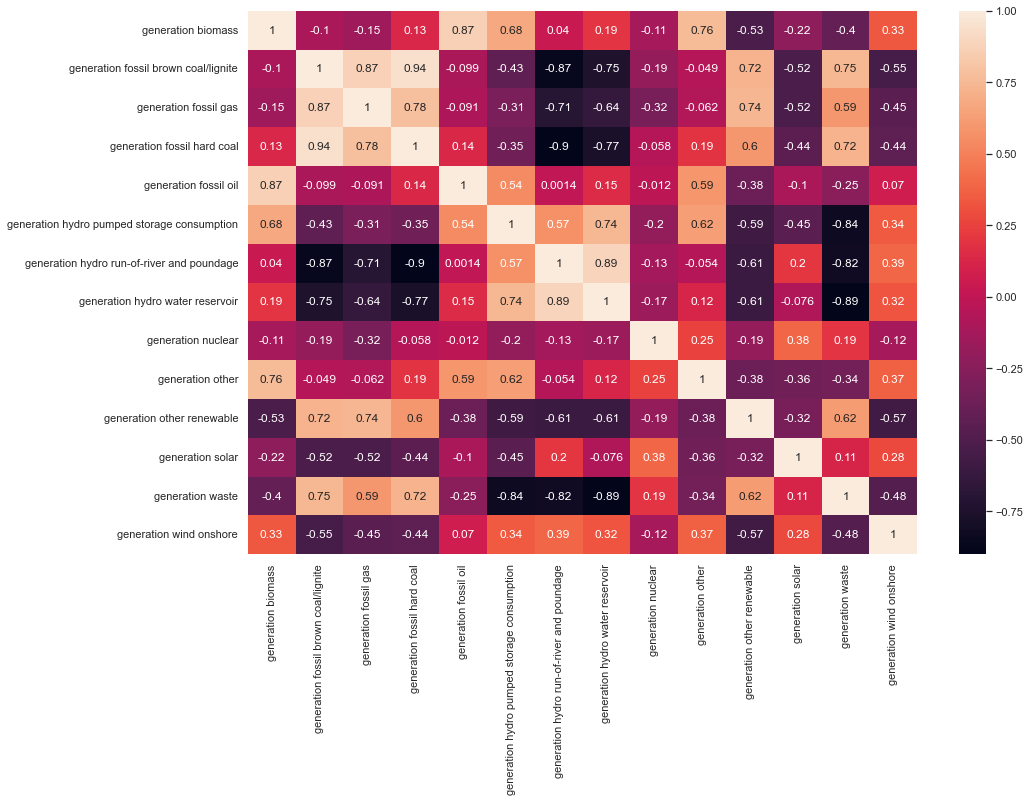

In [386]:
plt.figure(figsize=(15,10))
sns.heatmap(df_spn_month_2016.corr(),annot=True,);


<AxesSubplot:>

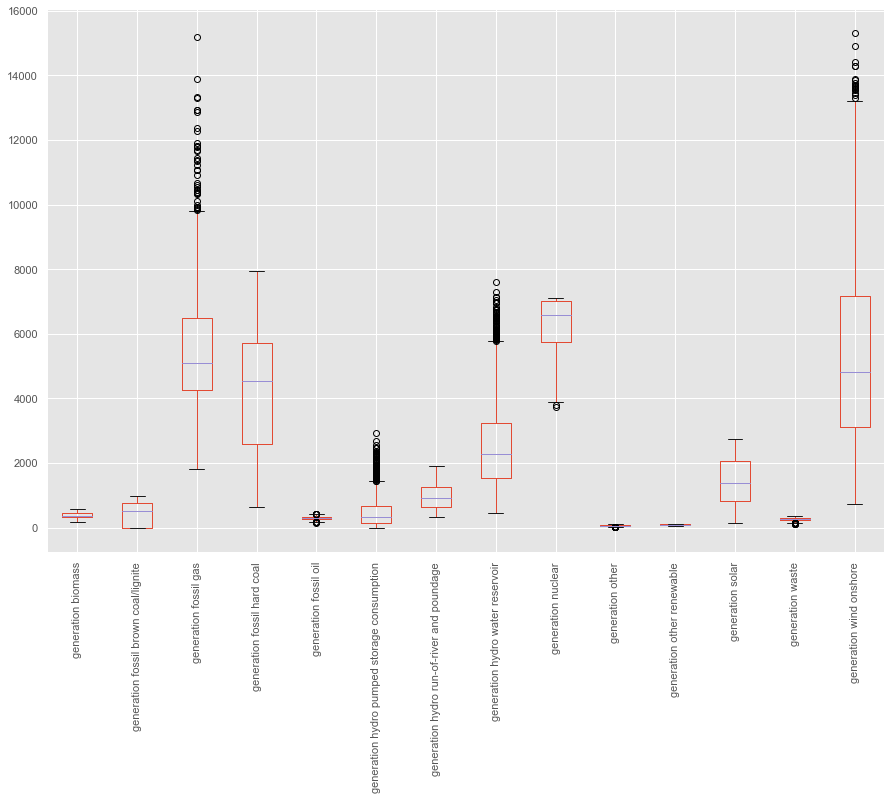

In [336]:
df_spn_day.boxplot(rot='90',figsize=(15,10))

<AxesSubplot:>

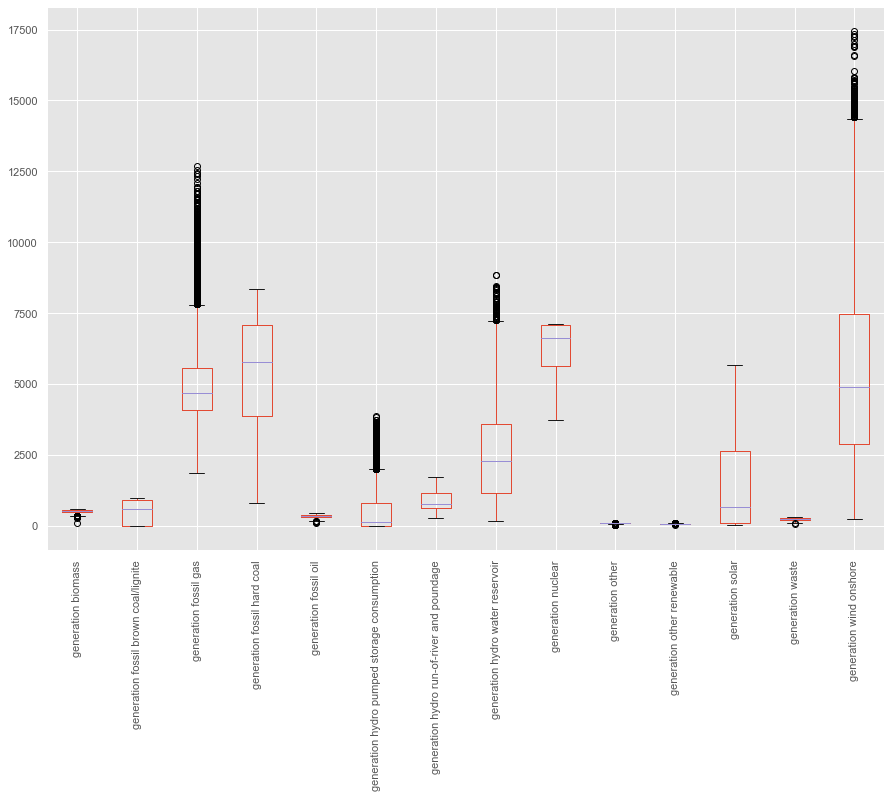

In [337]:
df_spn_day_2015.boxplot(rot='90',figsize=(15,10))

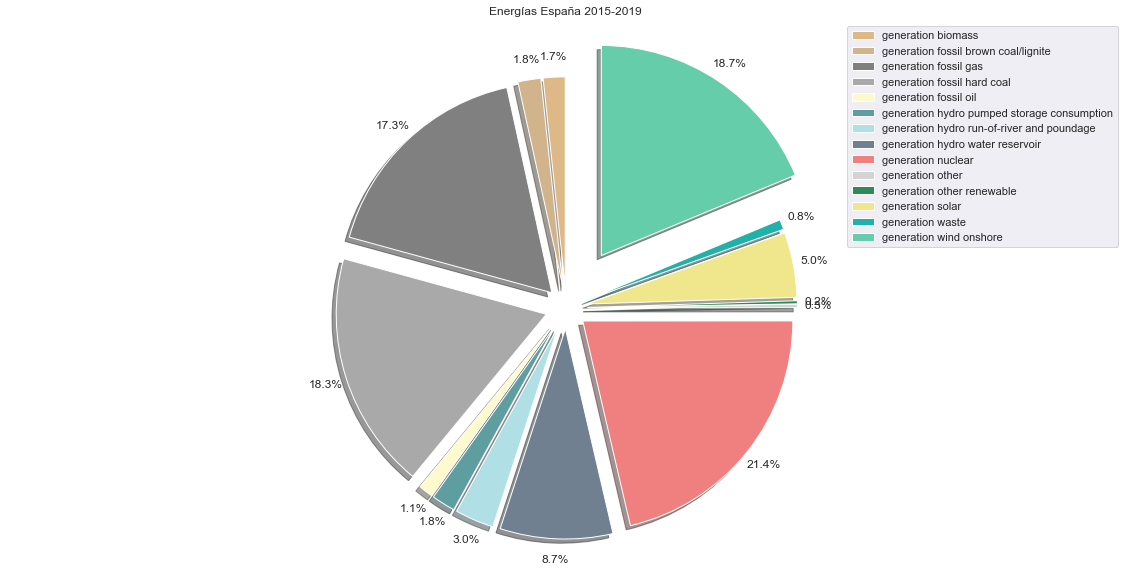

In [395]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
from tkinter import *
x1=df_spn_day_2015.loc[:,df_spn_day_2015.columns.str.startswith('generation')].sum()
labels = df_spn_day.columns
sizes = (x1/x1.sum())*100
explode = (0.1, 0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.3)  # only "explode" the 2nd slice (i.e. 'Hogs')
colors=['burlywood','tan','gray','darkgray','lemonchiffon','cadetblue','powderblue',
'slategray','lightcoral','lightgray','seagreen',
'khaki','lightseagreen','mediumaquamarine']

fig1, ax1 = plt.subplots(figsize=(20,10))
ax1.pie(sizes, explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90,colors=colors,pctdistance=1.1)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend(loc='best',labels=labels)
plt.title('Energías España 2015-2019')

plt.show()

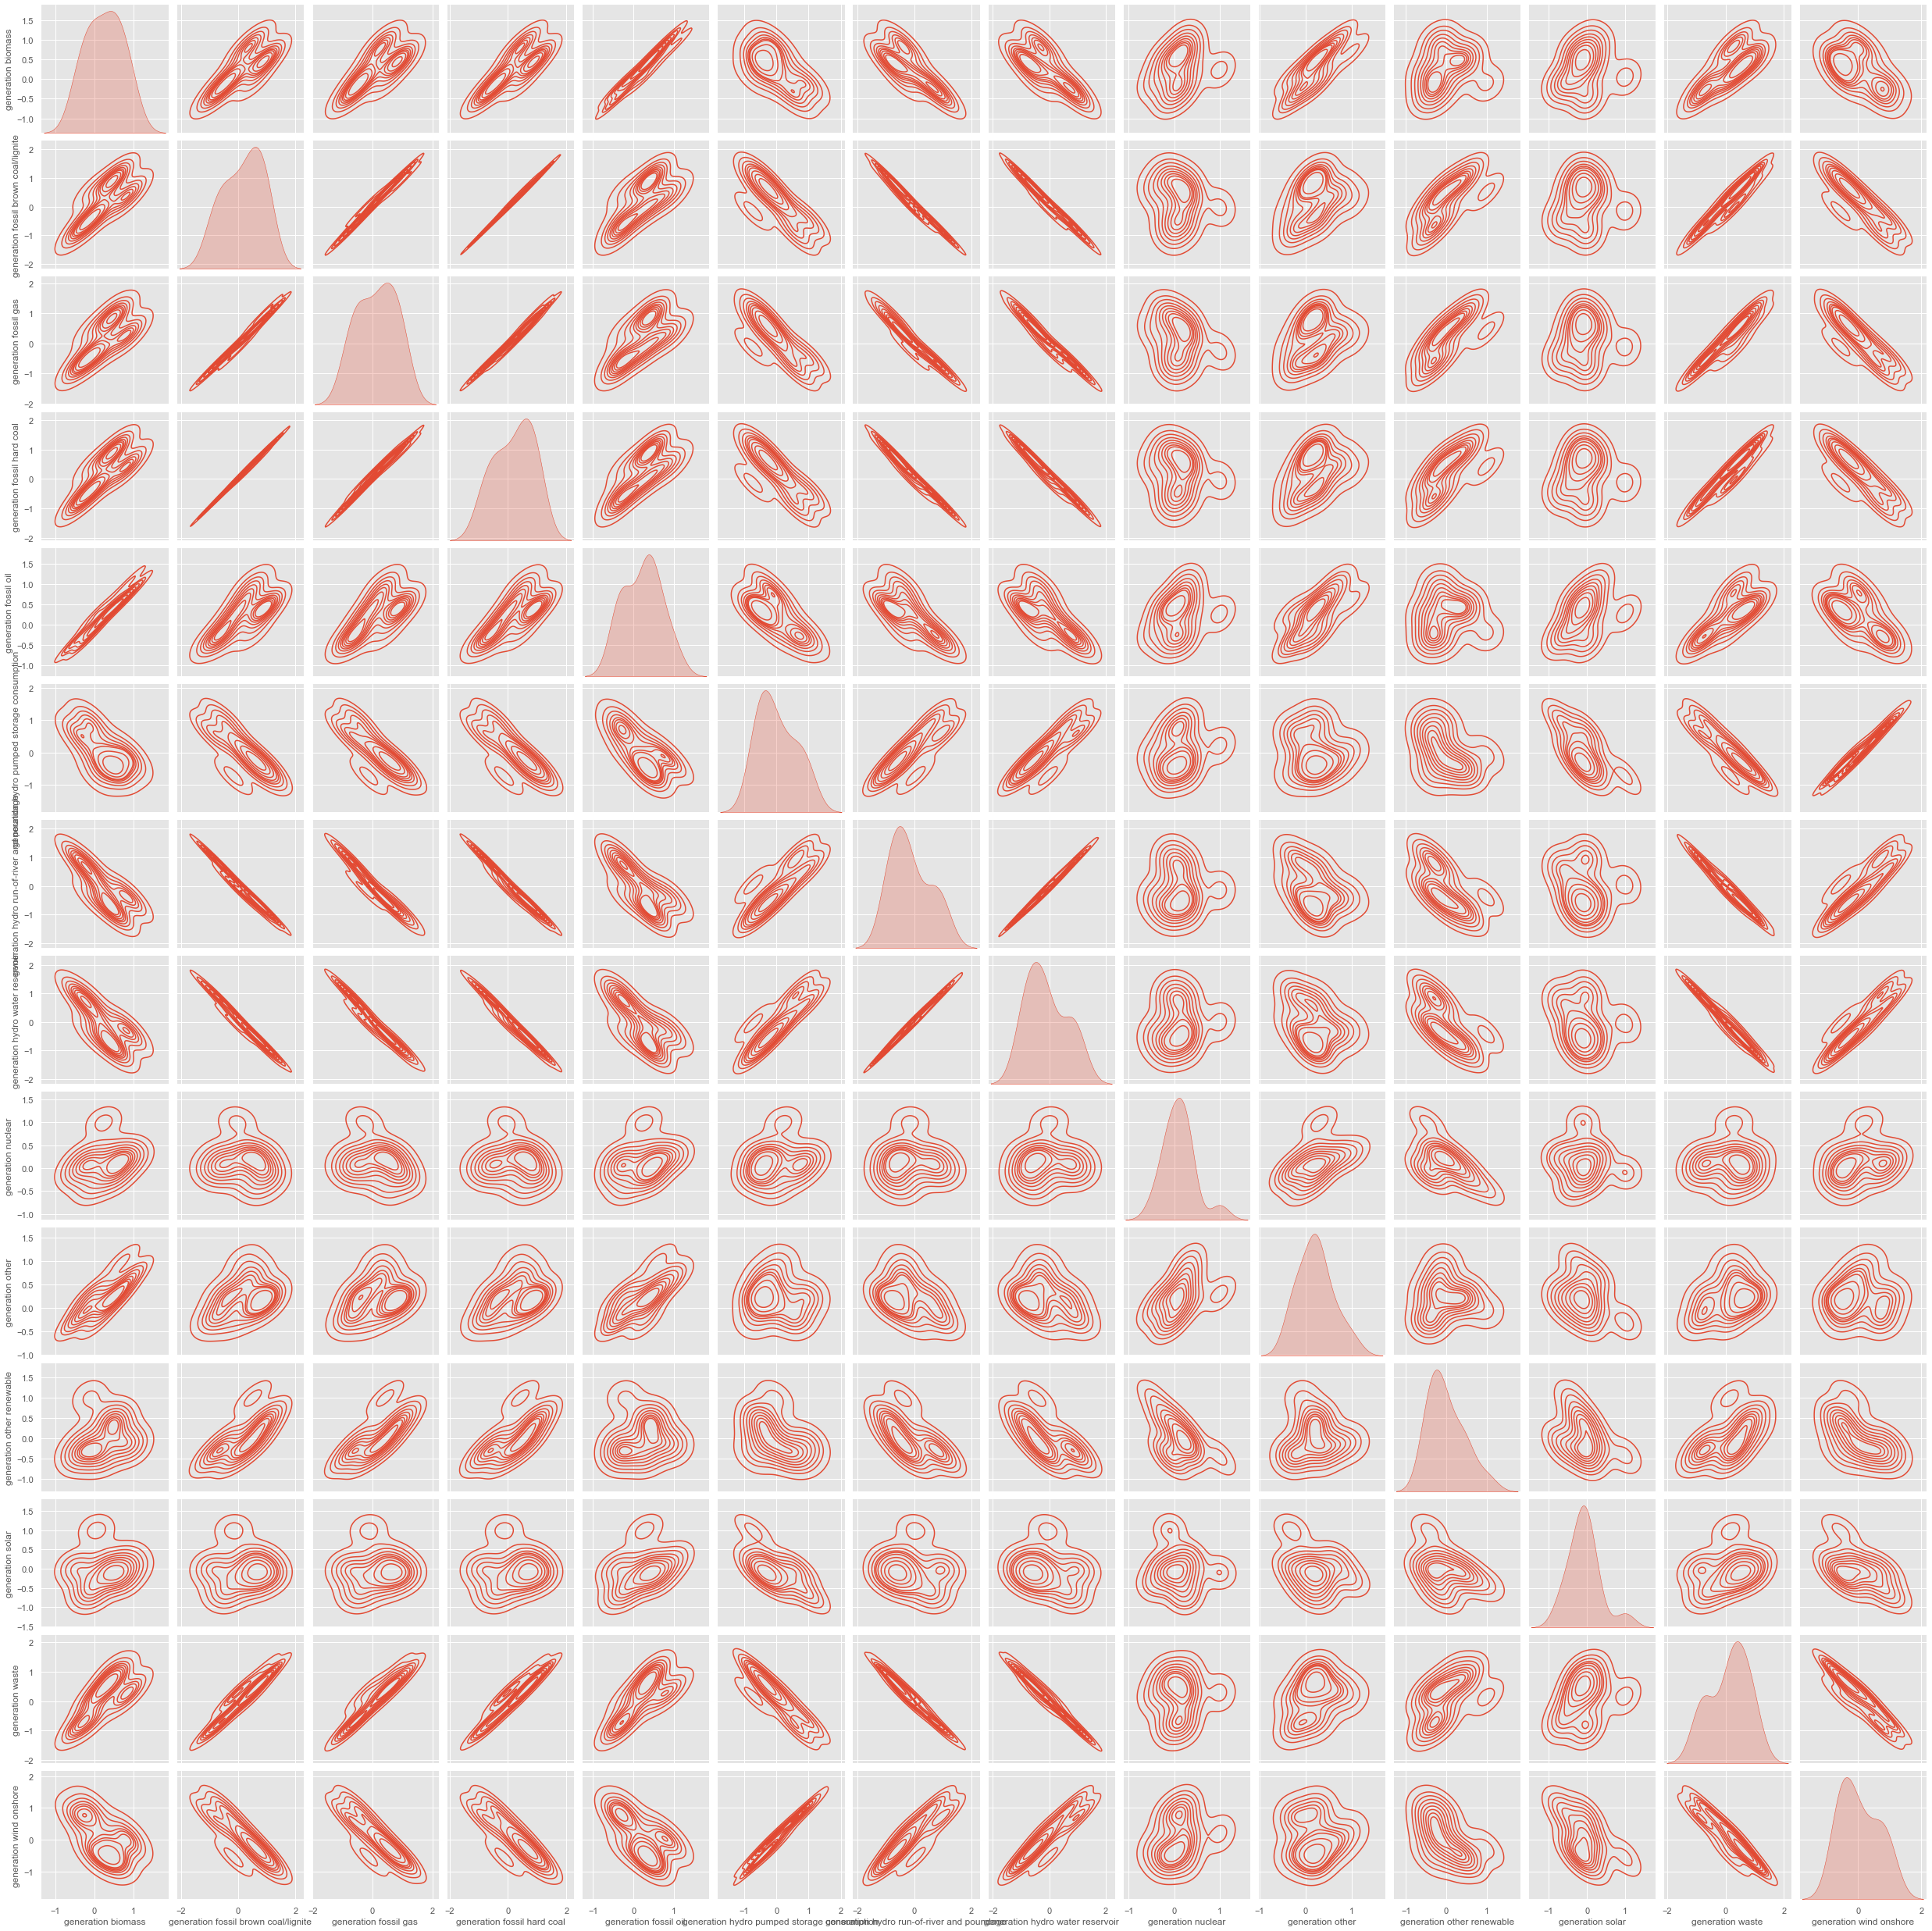

In [339]:
sns.pairplot(df_spn_month.corr(),kind='kde',);

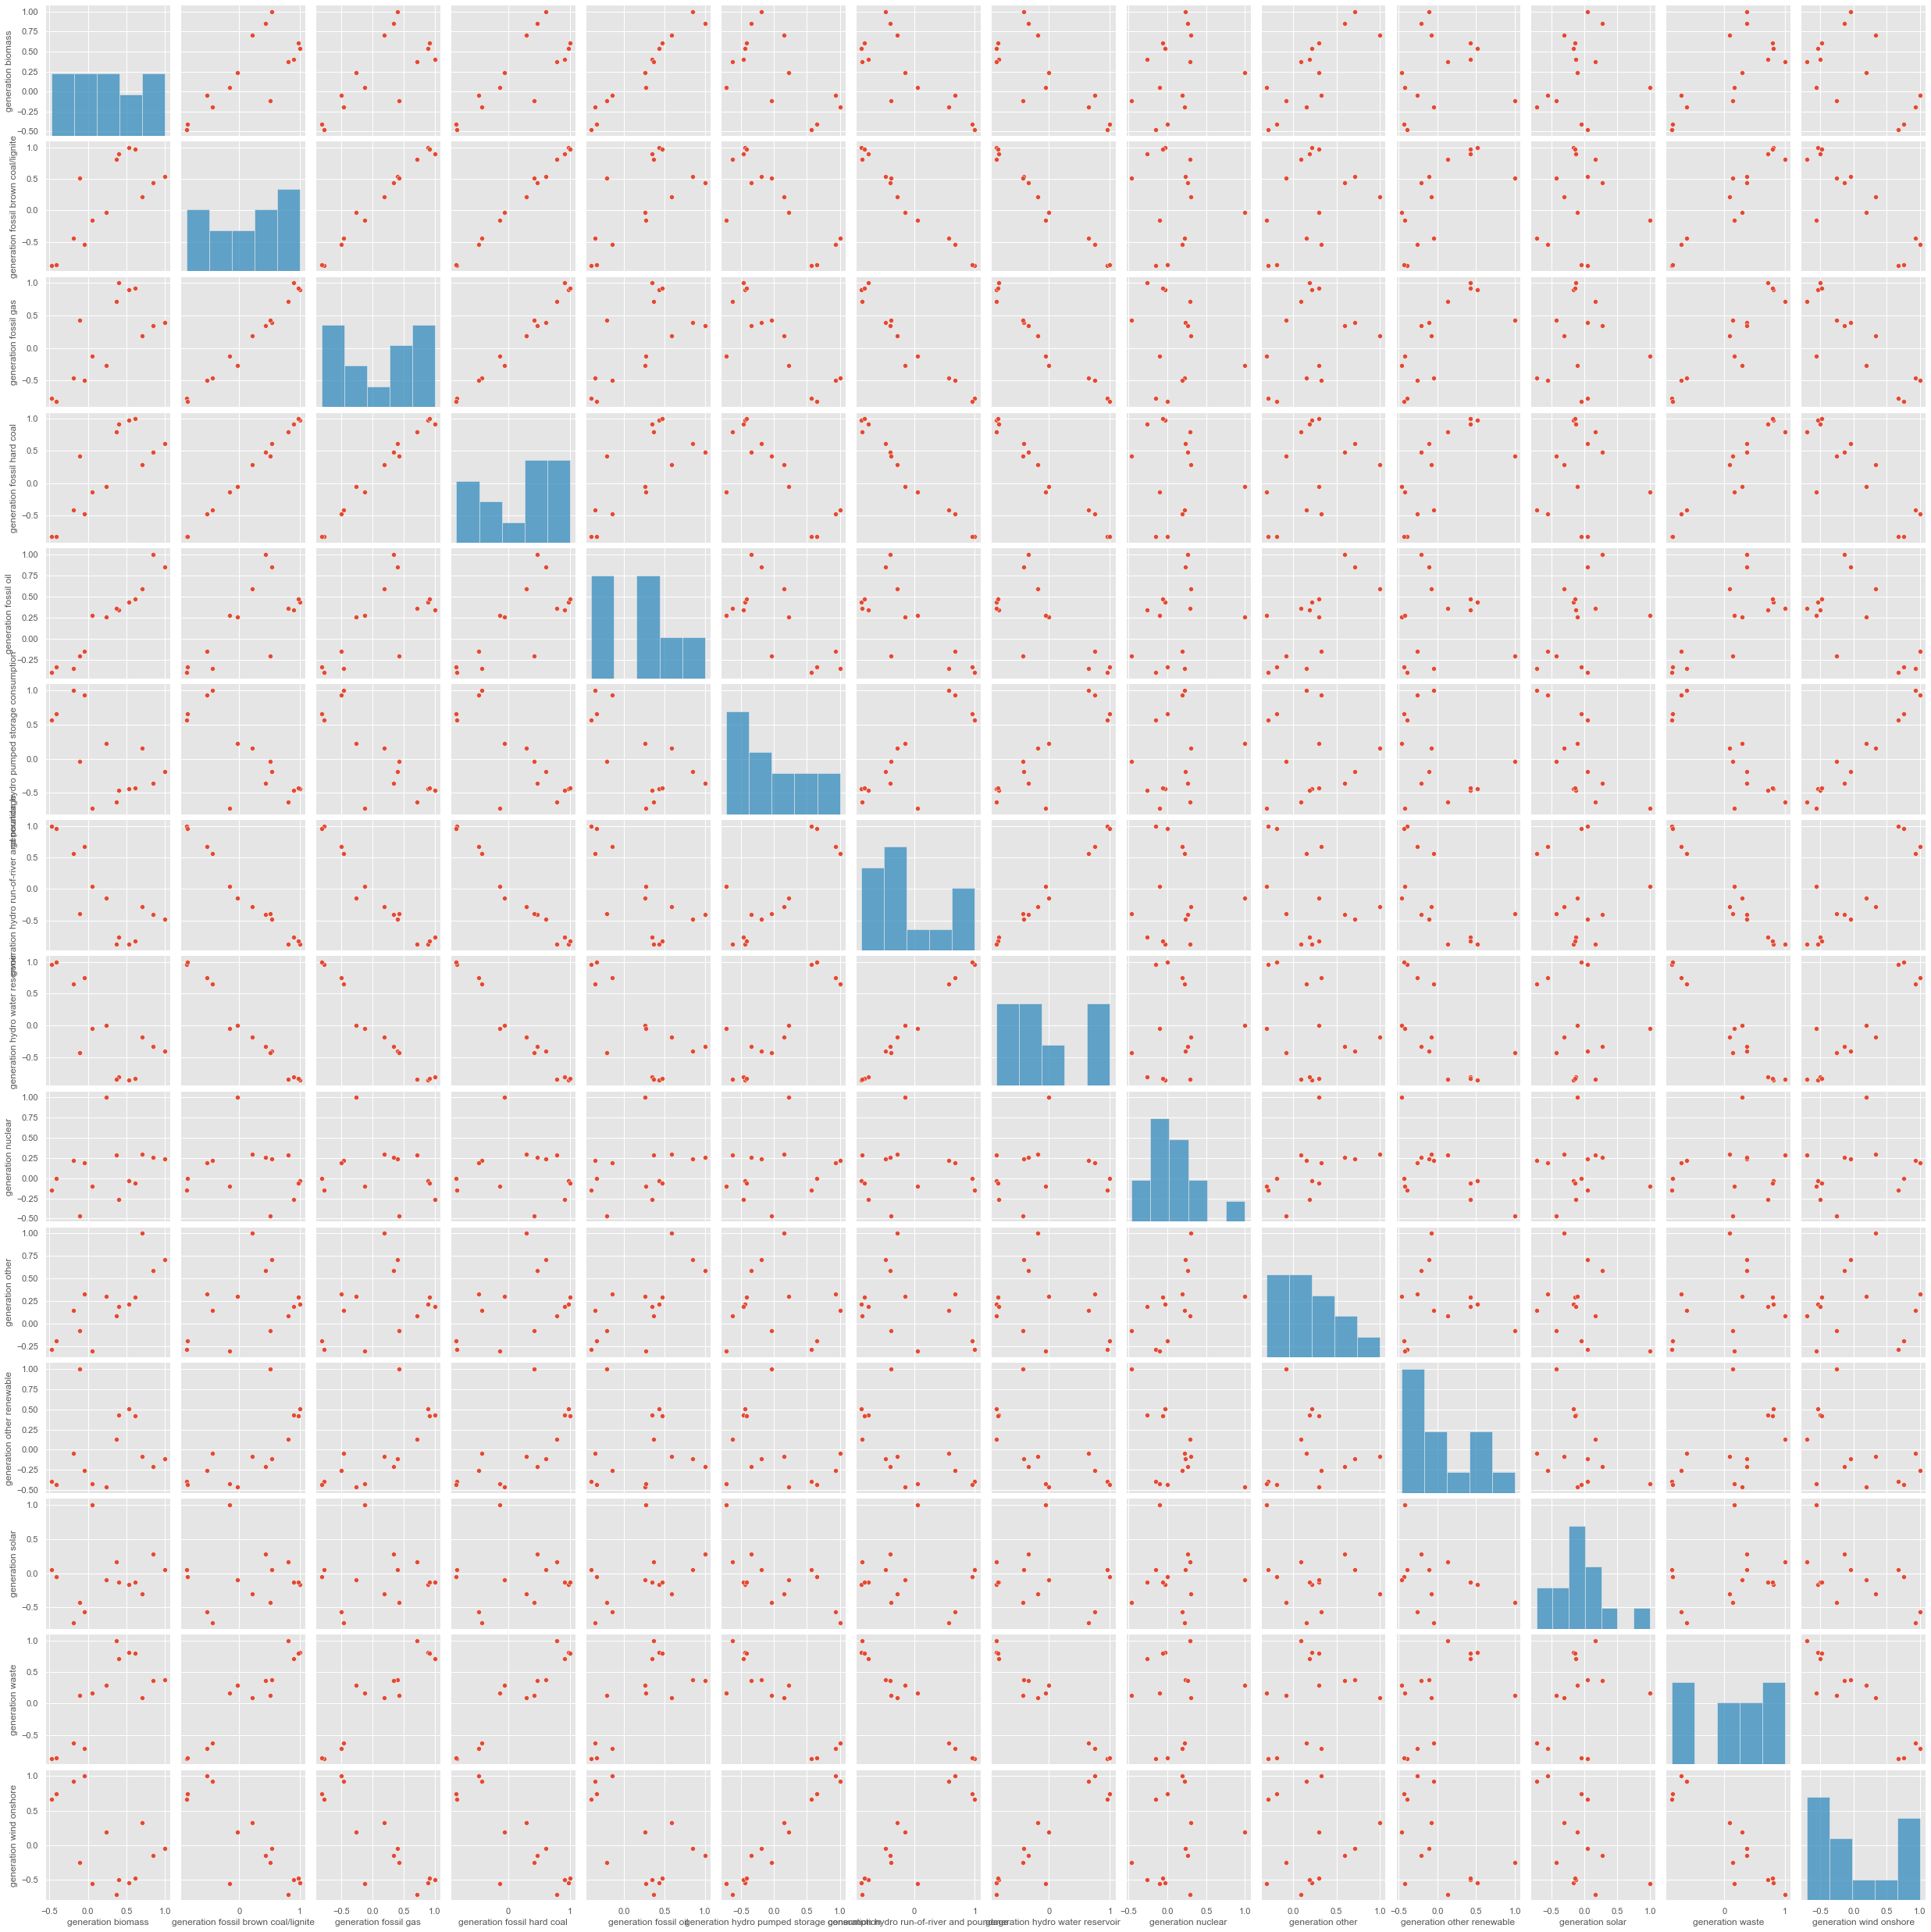

In [340]:
sns.pairplot(df_spn_month.corr());

<AxesSubplot:>

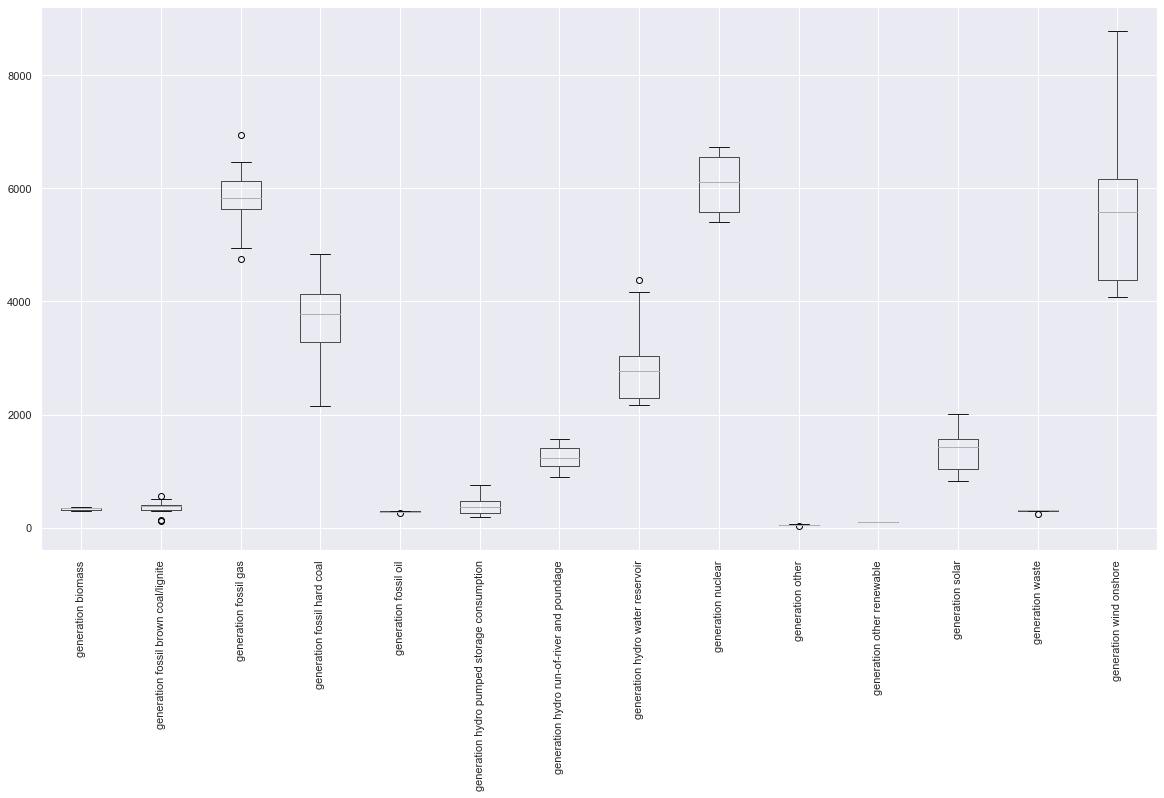

In [389]:
df_spn_month_2018.boxplot(rot='90',figsize=(20,10))

In [342]:
plt.style.use('ggplot')

<AxesSubplot:>

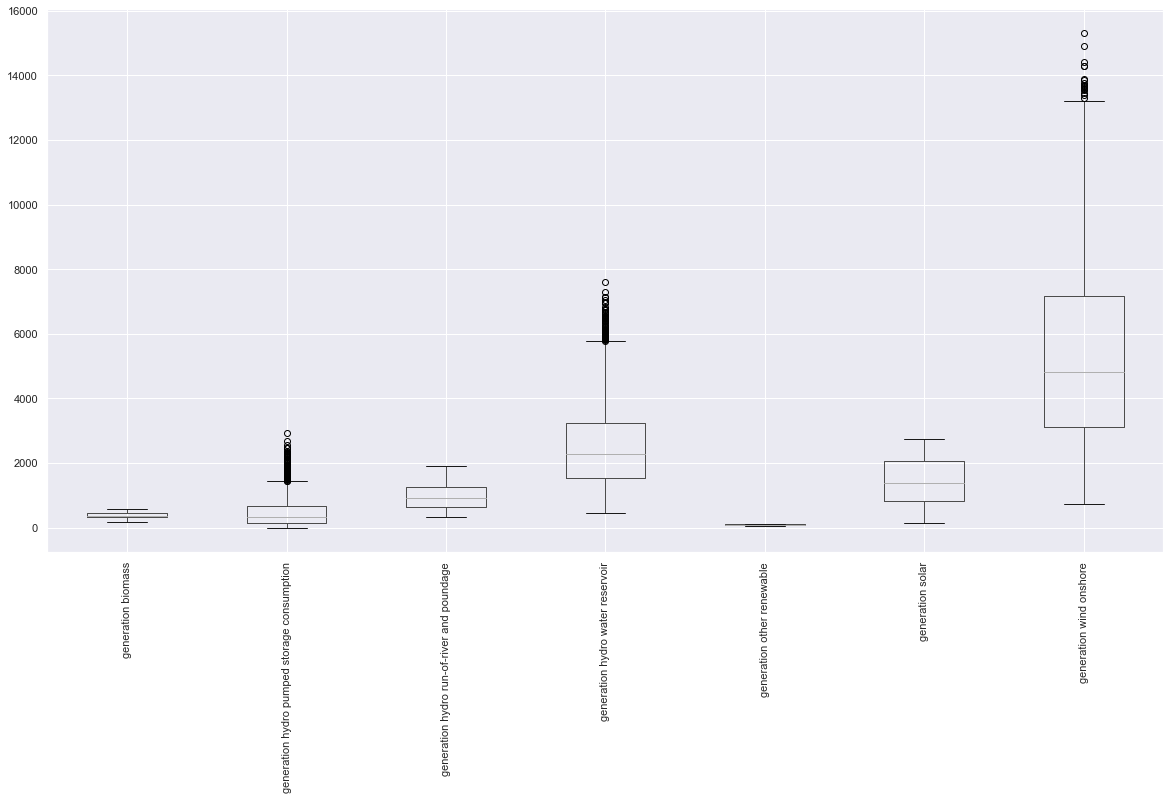

In [383]:
df_spn_day_rnw.boxplot(rot='90',figsize=(20,10))

<AxesSubplot:>

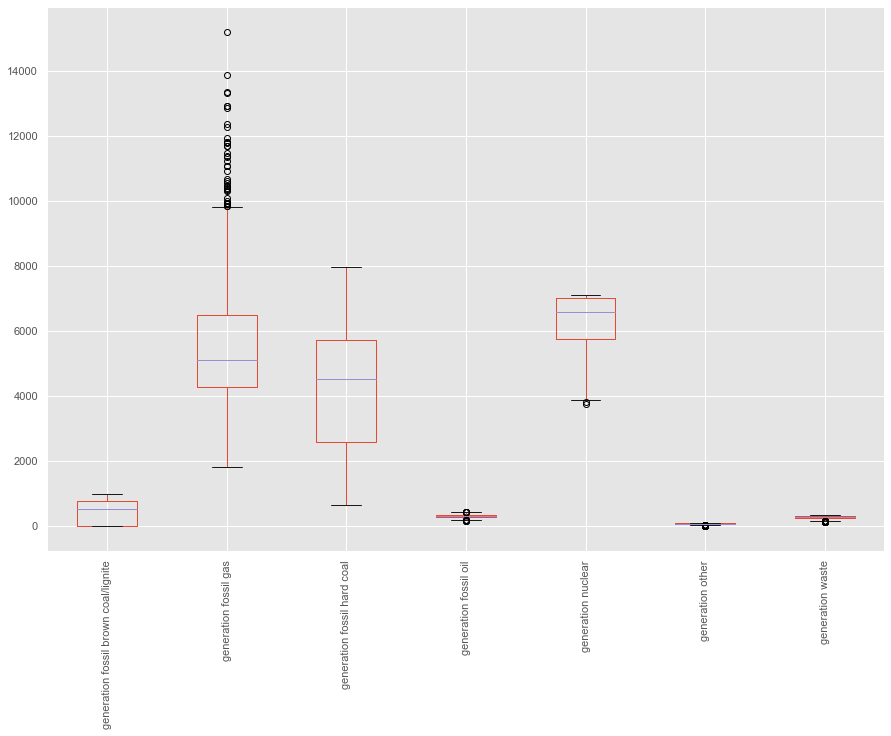

In [349]:
df_spn_day_nrnw.boxplot(rot='90',figsize=(15,10))

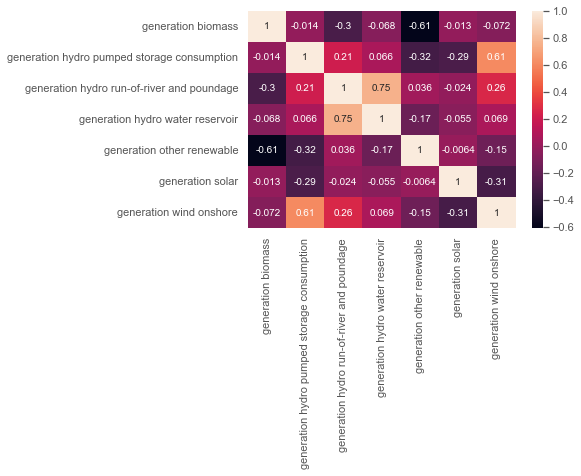

In [350]:
sns.heatmap(df_spn_day_rnw.corr(),annot=True);

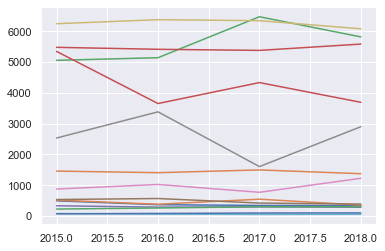

In [382]:
plt.plot(df_spn_year)

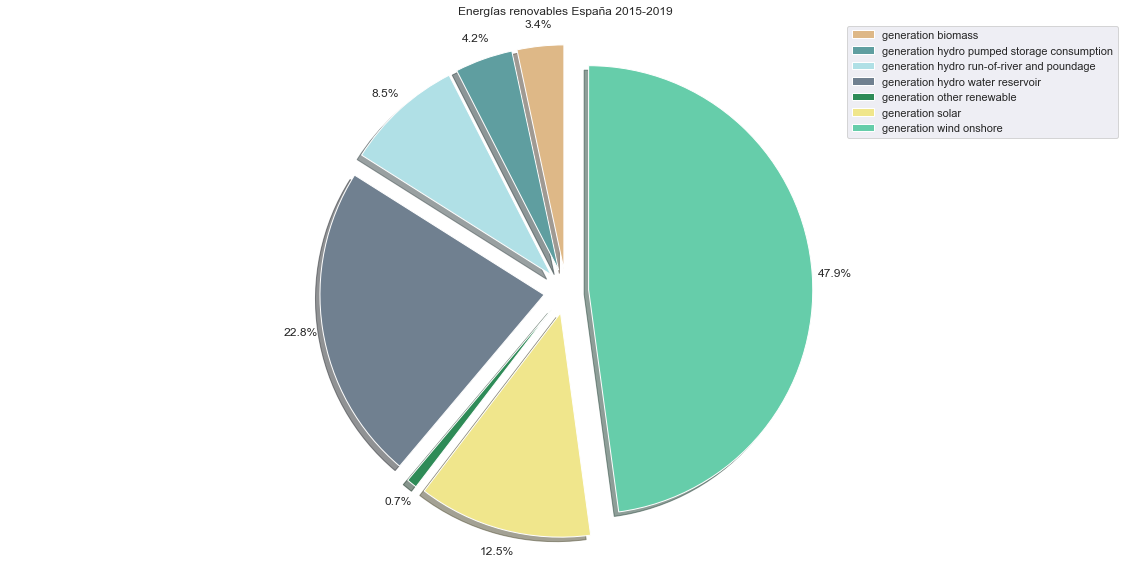

In [394]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
from tkinter import *
x1=df_spn_day_rnw.sum()
labels = df_spn_day_rnw.columns
sizes = (x1/x1.sum())*100
explode = (0.1,)*df_spn_day_rnw.shape[1] # only "explode" the 2nd slice (i.e. 'Hogs')
colorsrwn=['burlywood','cadetblue','powderblue',
'slategray','seagreen',
'khaki','mediumaquamarine']
colorsnrwn=['tan','gray','darkgray','lemonchiffon','lightcoral','lightgray','seagreen',
'lightseagreen']

fig1, ax1 = plt.subplots(figsize=(20,10))
ax1.pie(sizes, explode=explode, colors=colorsrwn,autopct='%1.1f%%',
        shadow=True, startangle=90,pctdistance=1.1)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend(loc='best',labels=labels)
plt.title('Energías renovables España 2015-2019')

plt.show()

Text(0.5, 1.0, 'Energías no renovables España 2015-2019')

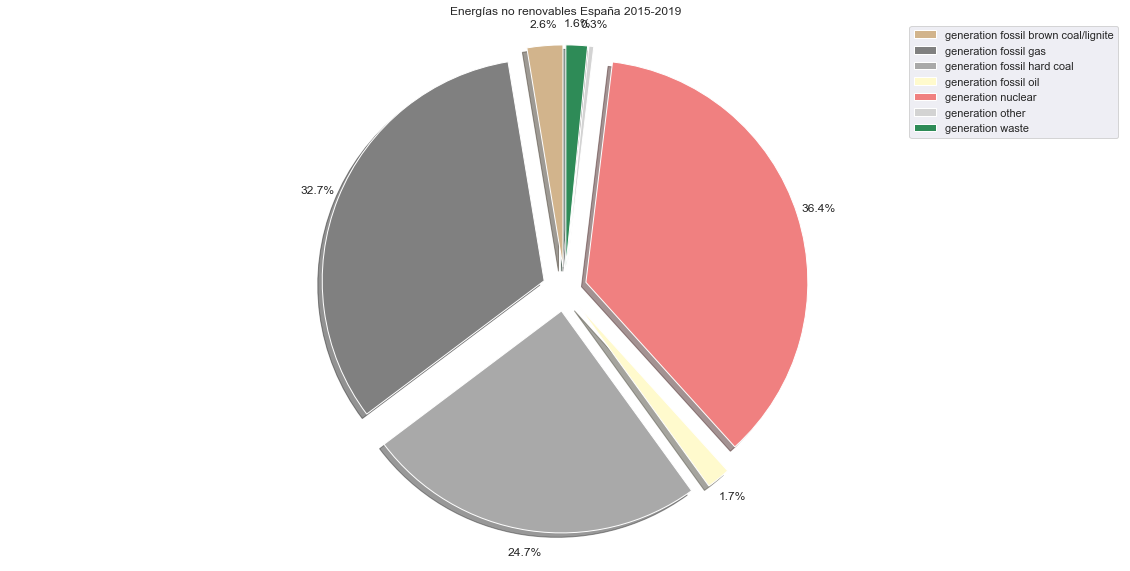

In [393]:
x1=df_spn_day_nrnw.sum()
labels = df_spn_day_nrnw.columns
sizes = (x1/x1.sum())*100
explode = (0.1,)*df_spn_day_nrnw.shape[1] # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots(figsize=(20,10))
ax1.pie(sizes, explode=explode,colors=colorsnrwn, autopct='%1.1f%%',
        shadow=True, startangle=90,pctdistance=1.1)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend(loc='best',labels=labels)
plt.title('Energías no renovables España 2015-2019')